# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

# Load Data

In [3]:
%%bash

ls ../../../raw_data/simulated_linear/

domains.tsv
embedding.tsv
metrics.csv
pseudo-Spatiotemporal-Map.pdf
Pseudotime_comparison_cell_type.pdf
Pseudotime_comparison_lineage.pdf
Pseudotime_lineage1_comparison_cell_type.pdf
pseudotime_output.csv
pSM_values.tsv
R_pseudotime.ipynb
sce_meta.csv
sce_obj.rds
simulated_expression.csv
simulated_linear_ontrac_input.csv
simulated_meta.csv
simulated.rds
simulated_robustness_hidden_feats.pdf
simulated_robustness_k.pdf
simulated_robustness_n_gcn_layers.pdf
simulated_robustness_n_neighbors.pdf
SpaceFlow.ipynb
spatialPCA.ipynb
Spearman_correlation_with_sim_time.csv
Spearman_correlation_with_truth_all_lineage.csv
Spearman_correlation_with_truth.csv
Spearman_correlation_with_truth_include_slingshot.csv
Spearman_correlation_with_truth_pivoted.csv
UMAP_embeddings.csv
utils.ipynb


## linear

In [10]:
simulated_linear_df = pd.read_csv(
    '../../../raw_data/simulated_linear/pseudotime_output.csv',
    index_col=0
)
simulated_linear_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,DPT_l3,monocle3_l3,TSCAN_l3,DPT_l3_norm,monocle3_l3_norm,TSCAN_l3_norm
cell1,0.815010,0.392859,0.815010,3,0.782942,19.494454,inf,61.0,0.731463,0.679359,...,NaN,NaN,NaN,NaN,3.338304,1.500442,46.0,0.352941,0.500000,0.441176
cell2,0.007832,0.528165,0.007832,1,0.004472,26.019171,inf,NaN,0.911824,0.843687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell3,0.238570,0.280569,0.238570,3,0.066722,15.455340,inf,107.0,0.637275,0.619238,...,NaN,NaN,NaN,NaN,0.185767,0.229433,7.0,0.127451,0.284314,0.058824
cell4,0.954609,0.950353,0.954609,2,0.778961,9.176393,inf,NaN,0.482966,0.571142,...,57.0,0.827586,0.655172,0.643678,NaN,NaN,NaN,NaN,NaN,NaN
cell5,0.008684,0.046309,0.008684,1,0.001262,25.956647,inf,NaN,0.905812,0.663327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# no spatialPCA output

# simulated_spatialPCA = pd.read_csv(
#     '../../../raw_data/simulated_linear/pseudotime_spatial_pca.csv',
#     index_col=0
# )
# simulated_spatialPCA.head()


In [12]:
simulated_spaceFlow = pd.read_csv(
    '../../../raw_data/simulated_linear/pSM_values.tsv',
    sep='\t',
    header=None
)
simulated_spaceFlow.head()


,0
0,0.61606
1,0.35025
2,0.72613
3,0.00000
4,0.69706


In [13]:
simulated_linear_df['spaceFlow'] = simulated_spaceFlow.iloc[:,0].values
simulated_linear_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,DPT_l3,monocle3_l3,TSCAN_l3,DPT_l3_norm,monocle3_l3_norm,TSCAN_l3_norm,spaceFlow
cell1,0.815010,0.392859,0.815010,3,0.782942,19.494454,inf,61.0,0.731463,0.679359,...,NaN,NaN,NaN,3.338304,1.500442,46.0,0.352941,0.500000,0.441176,0.61606
cell2,0.007832,0.528165,0.007832,1,0.004472,26.019171,inf,NaN,0.911824,0.843687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.35025
cell3,0.238570,0.280569,0.238570,3,0.066722,15.455340,inf,107.0,0.637275,0.619238,...,NaN,NaN,NaN,0.185767,0.229433,7.0,0.127451,0.284314,0.058824,0.72613
cell4,0.954609,0.950353,0.954609,2,0.778961,9.176393,inf,NaN,0.482966,0.571142,...,0.827586,0.655172,0.643678,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
cell5,0.008684,0.046309,0.008684,1,0.001262,25.956647,inf,NaN,0.905812,0.663327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69706


## non-linear

In [14]:
simulated_non_linear_df = pd.read_csv(
    '../../../raw_data/simulated_non_linear/pseudotime_output.csv',
    index_col=0
)
simulated_non_linear_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,DPT_l3,monocle3_l3,TSCAN_l3,DPT_l3_norm,monocle3_l3_norm,TSCAN_l3_norm
cell1,0.189955,0.723419,0.340023,3,0.199093,19.494454,inf,61.0,0.731463,0.679359,...,NaN,NaN,NaN,NaN,3.338304,1.500442,46.0,0.352941,0.500000,0.441176
cell2,0.898616,0.886213,0.235295,1,0.041554,26.019171,inf,NaN,0.911824,0.843687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell3,0.177252,0.572594,0.481424,3,0.445049,15.455340,inf,107.0,0.637275,0.619238,...,NaN,NaN,NaN,NaN,0.185767,0.229433,7.0,0.127451,0.284314,0.058824
cell4,0.977316,0.253594,0.793462,2,0.895616,9.176393,inf,NaN,0.482966,0.571142,...,57.0,0.827586,0.655172,0.643678,NaN,NaN,NaN,NaN,NaN,NaN
cell5,0.961119,0.982236,0.189996,1,0.014981,25.956647,inf,NaN,0.905812,0.663327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# no spatialPCA output

# simulated_spatialPCA = pd.read_csv(
#     '../../../raw_data/simulated_non_linear/pseudotime_spatial_pca.csv',
#     index_col=0
# )
# simulated_spatialPCA.head()


In [16]:
simulated_spaceFlow = pd.read_csv(
    '../../../raw_data/simulated_non_linear/pSM_values.tsv',
    sep='\t',
    header=None
)
simulated_spaceFlow.head()


,0
0,0.97110
1,0.61301
2,0.87815
3,0.77086
4,0.42111


In [17]:
simulated_non_linear_df['spaceFlow'] = simulated_spaceFlow.iloc[:,0].values
simulated_non_linear_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,DPT_l3,monocle3_l3,TSCAN_l3,DPT_l3_norm,monocle3_l3_norm,TSCAN_l3_norm,spaceFlow
cell1,0.189955,0.723419,0.340023,3,0.199093,19.494454,inf,61.0,0.731463,0.679359,...,NaN,NaN,NaN,3.338304,1.500442,46.0,0.352941,0.500000,0.441176,0.97110
cell2,0.898616,0.886213,0.235295,1,0.041554,26.019171,inf,NaN,0.911824,0.843687,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.61301
cell3,0.177252,0.572594,0.481424,3,0.445049,15.455340,inf,107.0,0.637275,0.619238,...,NaN,NaN,NaN,0.185767,0.229433,7.0,0.127451,0.284314,0.058824,0.87815
cell4,0.977316,0.253594,0.793462,2,0.895616,9.176393,inf,NaN,0.482966,0.571142,...,0.827586,0.655172,0.643678,NaN,NaN,NaN,NaN,NaN,NaN,0.77086
cell5,0.961119,0.982236,0.189996,1,0.014981,25.956647,inf,NaN,0.905812,0.663327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42111


## disconnected

In [18]:
simulated_disconnected_df = pd.read_csv(
    '../../../raw_data/simulated_disconnected/pseudotime_output.csv',
    index_col=0
)
simulated_disconnected_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,TSCAN_l1,DPT_l1_norm,monocle3_l1_norm,TSCAN_l1_norm,DPT_l2,monocle3_l2,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm
cell1,-0.400000,0.933977,0.400000,1,0.410390,309373.072185,33.282884,NaN,0.706402,0.503311,...,76.0,0.411504,0.327434,0.355450,NaN,NaN,NaN,NaN,NaN,NaN
cell2,0.400000,-0.970186,0.400000,1,0.441723,308107.505045,29.413140,104.0,0.675497,0.415011,...,111.0,0.349558,0.500000,0.521327,NaN,NaN,NaN,NaN,NaN,NaN
cell3,-0.405310,-0.829752,0.405310,1,0.490767,311162.540753,inf,2.0,0.796909,0.958057,...,155.0,0.592920,0.734513,0.729858,NaN,NaN,NaN,NaN,NaN,NaN
cell4,0.000000,-0.023475,0.000000,2,0.068882,4420.940105,22.579956,265.0,0.163355,0.300221,...,NaN,NaN,NaN,NaN,198.271935,0.005723,112.0,0.327434,0.247788,0.49115
cell5,0.405357,-0.981907,0.405357,1,0.448035,320219.126280,inf,60.0,0.993377,0.768212,...,153.0,0.986726,0.907080,0.720379,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
simulated_spatialPCA = pd.read_csv(
    '../../../raw_data/simulated_disconnected/pseudotime_spatial_pca.csv',
    index_col=0
)
simulated_spatialPCA.head()


,x
1,3.637973
2,NaN
3,NaN
4,23.341173
5,NaN


In [20]:
simulated_spaceFlow = pd.read_csv(
    '../../../raw_data/simulated_disconnected/pSM_values.tsv',
    sep='\t',
    header=None
)
simulated_spaceFlow.head()


,0
0,0.71804
1,0.39255
2,0.44391
3,0.99396
4,0.39992


In [21]:
simulated_disconnected_df['spatialPCA'] = simulated_spatialPCA['x'].values
simulated_disconnected_df['spaceFlow'] = simulated_spaceFlow.iloc[:,0].values
simulated_disconnected_df.head()


,x,y,r,lineage,ONTraC,DPT,monocle3,TSCAN,DPT_norm,monocle3_norm,...,monocle3_l1_norm,TSCAN_l1_norm,DPT_l2,monocle3_l2,TSCAN_l2,DPT_l2_norm,monocle3_l2_norm,TSCAN_l2_norm,spatialPCA,spaceFlow
cell1,-0.400000,0.933977,0.400000,1,0.410390,309373.072185,33.282884,NaN,0.706402,0.503311,...,0.327434,0.355450,NaN,NaN,NaN,NaN,NaN,NaN,3.637973,0.71804
cell2,0.400000,-0.970186,0.400000,1,0.441723,308107.505045,29.413140,104.0,0.675497,0.415011,...,0.500000,0.521327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39255
cell3,-0.405310,-0.829752,0.405310,1,0.490767,311162.540753,inf,2.0,0.796909,0.958057,...,0.734513,0.729858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44391
cell4,0.000000,-0.023475,0.000000,2,0.068882,4420.940105,22.579956,265.0,0.163355,0.300221,...,NaN,NaN,198.271935,0.005723,112.0,0.327434,0.247788,0.49115,23.341173,0.99396
cell5,0.405357,-0.981907,0.405357,1,0.448035,320219.126280,inf,60.0,0.993377,0.768212,...,0.907080,0.720379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.39992


# calculation

In [22]:
method, dataset, lineage, corr = [], [], [], []

# linear

method.append('ONTraC')
dataset.append('linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['ONTraC'],nan_policy='omit')[0]))

method.append('spaceFlow')
dataset.append('linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['spaceFlow'],nan_policy='omit')[0]))

method.append('SpatialPCA')
dataset.append('linear')
lineage.append('all')
corr.append(abs(np.nan))

method.append('DPT')
dataset.append('linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['DPT'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['monocle3'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['TSCAN'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['DPT_l1'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['monocle3_l1'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['TSCAN_l1'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['DPT_l2'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['monocle3_l2'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['TSCAN_l2'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['DPT_l3'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['monocle3_l3'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_linear_df['r'],simulated_linear_df['TSCAN_l3'],nan_policy='omit')[0]))

# non linear

method.append('ONTraC')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['ONTraC'],nan_policy='omit')[0]))

method.append('spaceFlow')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['spaceFlow'],nan_policy='omit')[0]))

method.append('SpatialPCA')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(np.nan))

method.append('DPT')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['DPT'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['monocle3'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('non linear')
lineage.append('all')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['TSCAN'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('non linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['DPT_l1'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('non linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['monocle3_l1'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('non linear')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['TSCAN_l1'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('non linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['DPT_l2'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('non linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['monocle3_l2'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('non linear')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['TSCAN_l2'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('non linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['DPT_l3'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('non linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['monocle3_l3'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('non linear')
lineage.append('lineage3')
corr.append(abs(spearmanr(simulated_non_linear_df['r'],simulated_non_linear_df['TSCAN_l3'],nan_policy='omit')[0]))

# disconnected

method.append('ONTraC')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['ONTraC'],nan_policy='omit')[0]))

method.append('spaceFlow')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['spaceFlow'],nan_policy='omit')[0]))

method.append('SpatialPCA')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['spatialPCA'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['DPT'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['monocle3'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('disconnected')
lineage.append('all')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['TSCAN'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('disconnected')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['DPT_l1'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('disconnected')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['monocle3_l1'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('disconnected')
lineage.append('lineage1')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['TSCAN_l1'],nan_policy='omit')[0]))

method.append('DPT')
dataset.append('disconnected')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['DPT_l2'],nan_policy='omit')[0]))

method.append('Monocle3')
dataset.append('disconnected')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['monocle3_l2'],nan_policy='omit')[0]))

method.append('TSCAN')
dataset.append('disconnected')
lineage.append('lineage2')
corr.append(abs(spearmanr(simulated_disconnected_df['r'],simulated_disconnected_df['TSCAN_l2'],nan_policy='omit')[0]))


In [23]:
summary_df = pd.DataFrame({'method': method,
                           'dataset': dataset,
                           'lineage': lineage,
                           'corr': corr
                          })
summary_df.head()


,method,dataset,lineage,corr
0,ONTraC,linear,all,0.996846
1,spaceFlow,linear,all,0.151474
2,SpatialPCA,linear,all,NaN
3,DPT,linear,all,0.005607
4,Monocle3,linear,all,0.024496


In [34]:
summary_df

,method,dataset,lineage,corr
0,ONTraC,linear,all,0.996846
1,spaceFlow,linear,all,0.151474
2,SpatialPCA,linear,all,NaN
3,DPT,linear,all,0.005607
4,Monocle3,linear,all,0.024496
5,TSCAN,linear,all,0.033343
6,DPT,linear,lineage1,0.009675
7,Monocle3,linear,lineage1,0.009811
8,TSCAN,linear,lineage1,0.010001
9,DPT,linear,lineage2,0.145997


# visualization

## linear

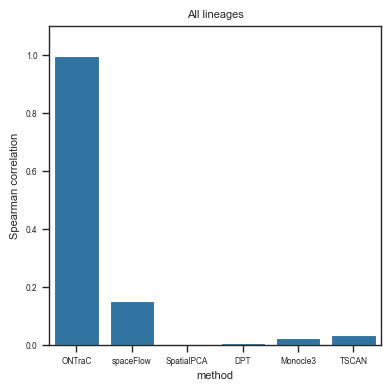

In [24]:
data_df = summary_df[(summary_df['dataset'] == 'linear') & (summary_df['lineage'] == 'all')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(4,4))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,1.1)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('All lineages')
    fig.tight_layout()
    fig.savefig('linear_all_lineages.pdf', transparent=True)

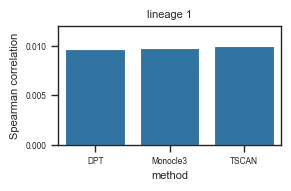

In [25]:
data_df = summary_df[(summary_df['dataset'] == 'linear') & (summary_df['lineage'] == 'lineage1')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.012)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 1')
    fig.tight_layout()
    fig.savefig('linear_lineage_1.pdf', transparent=True)

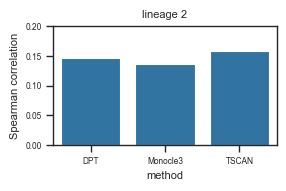

In [26]:
data_df = summary_df[(summary_df['dataset'] == 'linear') & (summary_df['lineage'] == 'lineage2')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.2)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 2')
    fig.tight_layout()
    fig.savefig('linear_lineage_2.pdf', transparent=True)

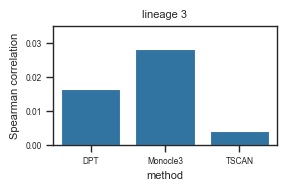

In [27]:
data_df = summary_df[(summary_df['dataset'] == 'linear') & (summary_df['lineage'] == 'lineage3')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.035)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 3')
    fig.tight_layout()
    fig.savefig('linear_lineage_3.pdf', transparent=True)

## non linear

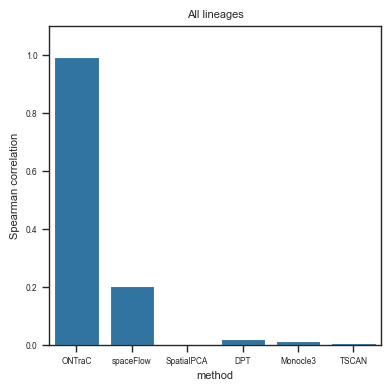

In [28]:
data_df = summary_df[(summary_df['dataset'] == 'non linear') & (summary_df['lineage'] == 'all')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(4,4))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,1.1)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('All lineages')
    fig.tight_layout()
    fig.savefig('non_linear_all_lineages.pdf', transparent=True)
    

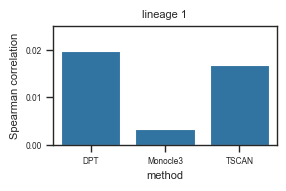

In [29]:
data_df = summary_df[(summary_df['dataset'] == 'non linear') & (summary_df['lineage'] == 'lineage1')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.025)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 1')
    fig.tight_layout()
    fig.savefig('non_linear_lineage_1.pdf', transparent=True)

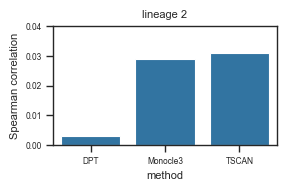

In [30]:
data_df = summary_df[(summary_df['dataset'] == 'non linear') & (summary_df['lineage'] == 'lineage2')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.04)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 2')
    fig.tight_layout()
    fig.savefig('non_linear_lineage_2.pdf', transparent=True)

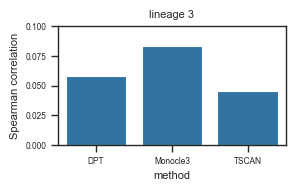

In [38]:
data_df = summary_df[(summary_df['dataset'] == 'non linear') & (summary_df['lineage'] == 'lineage3')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.1)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 3')
    fig.tight_layout()
    fig.savefig('non_linear_lineage_3.pdf', transparent=True)

## disconnected

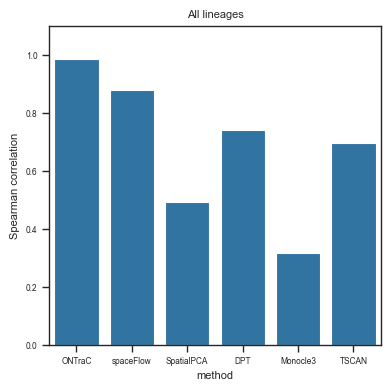

In [31]:
data_df = summary_df[(summary_df['dataset'] == 'disconnected') & (summary_df['lineage'] == 'all')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(4,4))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,1.1)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('All lineages')
    fig.tight_layout()
    fig.savefig('disconnected_all_lineages.pdf', transparent=True)
    

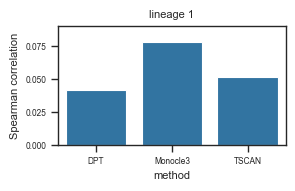

In [32]:
data_df = summary_df[(summary_df['dataset'] == 'disconnected') & (summary_df['lineage'] == 'lineage1')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.09)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 1')
    fig.tight_layout()
    fig.savefig('disconnected_lineage_1.pdf', transparent=True)

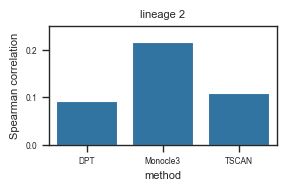

In [33]:
data_df = summary_df[(summary_df['dataset'] == 'disconnected') & (summary_df['lineage'] == 'lineage2')]

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(3,2))
    sns.barplot(data = data_df,
                x = 'method',
                y = 'corr',
                ax = ax)
    ax.set_ylim(0,0.25)
    ax.set_ylabel('Spearman correlation')
    ax.set_title('lineage 2')
    fig.tight_layout()
    fig.savefig('disconnected_lineage_2.pdf', transparent=True)